# **Lab 4: First Draft of Final Project**
    - Salissa Hernandez
    - Juan Carlos Dominguez
    - Leonardo Piedrahita
    - Brice Danvide

# **Objective**

This project investigates the application of **Reinforcement Learning (RL)** to the domain of **autonomous vehicles**, with a focus on enhancing safety and decision-making in dynamic driving environments. The analysis utilizes a **simulated highway environment** (via highway-env) to train an RL agent to perform fundamental tasks such as navigation, obstacle avoidance, and interaction with other vehicles. By implementing and evaluating different RL algorithms, the study aims to assess their effectiveness in facilitating real-time driving decisions and to explore their adaptability for real-world applications.

The **primary objective** is to evaluate how RL can enable an autonomous vehicle to navigate safely and efficiently within a simulated environment and to compare the performance of various RL algorithms in managing complex driving scenarios. Additionally, the project examines the broader implications of RL in autonomous driving, including considerations of safety, efficiency, and ethics, with the goal of providing insights into challenges associated with deploying RL-based systems in real-world autonomous vehicles.

### **Terminology Used in This Project**

To ensure clarity and precision in the analysis, the following key terms are defined for use throughout the project:

- **Reinforcement Learning (RL)**: A machine learning paradigm where an agent learns to make decisions by interacting with an environment, receiving rewards or penalties based on its actions (Medium).
- **Agent**: The autonomous vehicle in this context, which learns to navigate and make driving decisions based on environmental feedback and rewards (OpenAI Spinning Up).
- **Environment**: The simulated world in which the agent operates, encompassing roads, traffic signs, other vehicles, pedestrians, and obstacles (OpenAI Spinning Up).
- **State**: A specific configuration of the environment, including attributes such as the vehicle’s position, speed, distance to obstacles, or presence of other vehicles (OpenAI Spinning Up).
- **Action**: The decision executed by the agent in a given state, such as steering left, accelerating, or braking (OpenAI Spinning Up).
- **Reward**: A numerical value assigned to the agent’s actions, guiding it toward desirable behaviors, such as avoiding collisions or adhering to traffic regulations (OpenAI Spinning Up).
- **Deep Q-Networks (DQN)**: RL algorithm designed to estimate expected future rewards for each action, enabling optimal decision-making in specific states (HuggingFace).
- **Proximal Policy Optimization (PPO)**: A state-of-the-art RL algorithm suited for training in environments with large action spaces, such as controlling a vehicle’s speed and direction (HuggingFace).
- **Advantage Actor-Critic (A2C)**: A synchronous variant of the Actor-Critic algorithm that uses two neural networks—one to predict the policy (actor) and another to estimate the value function (critic). A2C helps balance exploration and exploitation and can be effective in environments where stability and sample efficiency are important (OpenAI Spinning Up, HuggingFace).

**Sources**:

- Medium: https://medium.com/%40gurkanc/deep-reinforcement-learning-agents-algorithms-and-strategies-a-practical-game-scenario-a412428ae0e0  
- OpenAI Spinning Up - Intro to RL: https://spinningup.openai.com/en/latest/spinningup/rl_intro.html  
- HuggingFace (DQN): https://huggingface.co/learn/deep-rl-course/en/unit3/from-q-to-dqn  
- HuggingFace (PPO): https://huggingface.co/blog/deep-rl-ppo  
- HuggingFace (A2C): https://huggingface.co/blog/deep-rl-a2c

**References**:

- https://github.com/Farama-Foundation/HighwayEnv?tab=readme-ov-file
- https://github.com/TeyKra/Reinforcement-Learning-HighwayEnv/blob/main/Reinforcement%20Learning%20HighwayEnv.ipynb

# **1. Motivation**

## **1.1 Motivation for Our Research Project**

Autonomous vehicles (AVs) represent a transformative shift in the transportation industry, offering potential for enhanced safety, accessibility, and efficiency. Despite progress from industry leaders such as Waymo, AVs face significant challenges in consistently making safe, efficient, and ethically sound decisions in real time. These systems must navigate dynamic environments characterized by unpredictable traffic patterns, diverse road conditions, variable weather, and interactions with pedestrians and other vehicles.

Reinforcement learning (RL) provides a promising framework for optimizing AV decision-making through experience-based learning. Unlike rule-based or supervised approaches, RL agents learn optimal policies by interacting with their environment, enabling flexible and adaptive responses to novel situations. This study investigates how RL can enhance AV performance in terms of safety, efficiency, and adaptability, with the aim of developing robust navigation strategies that reduce accident rates and improve traffic flow.

The **motivation behind this project is to investigate how RL can improve AVs’ performance in terms of safety, efficiency, and adaptability**. By leveraging RL algorithms, we aim to enhance an autonomous vehicle’s ability to make intelligent decisions—such as when to accelerate, brake, or avoid obstacles—based on contextual information. These algorithms can generalize across varied driving scenarios, which may lead to more robust navigation strategies, reduced accident rates, and improved overall traffic efficiency.

The societal impetus for this research stems from the need to mitigate the high incidence of accidents caused by human error, which accounts for over 90% of vehicular crashes according to the National Highway Traffic Safety Administration (NHTSA). AVs have the potential to eliminate risks associated with distraction, fatigue, and impaired judgment, while also improving mobility for individuals unable to drive and reducing emissions through optimized driving patterns. This project contributes to the advancement of autonomous technologies by exploring RL as a scalable and adaptive framework for intelligent decision-making in complex driving environments.

## **1.2 Importance of the Investigation**

This research addresses critical challenges in autonomous driving: ensuring safety and enabling real-time decision-making in uncertain environments. Current AV systems, such as Tesla’s Autopilot, Waymo’s Driver, and Cruise’s Origin platform, have made significant strides but struggle with emergent, high-stakes scenarios, including sudden pedestrian crossings, dynamic lane changes, traffic signal malfunctions, construction detours, and adverse weather conditions. High-profile incidents highlight these limitations. For instance, in 2023, Cruise suspended operations nationwide after a San Francisco incident where a vehicle failed to yield appropriately, dragging a pedestrian following a collision. Similarly, Tesla’s Autopilot has faced National Highway Traffic Safety Administration (NHTSA) investigations for collisions with stationary emergency vehicles and phantom braking, while Waymo’s overly cautious behavior has disrupted traffic flow.

These issues stem from the rigidity of deterministic or supervised-learning-based frameworks, which rely on predefined rules or labeled datasets and struggle to generalize to rare or novel situations. RL offers a compelling alternative by allowing agents to iteratively refine behavior through environmental feedback, learning nuanced behaviors—such as yielding to aggressive drivers or adjusting speed in low-visibility conditions—that are difficult to hand-code or annotate.

The investigation is timely given the growing deployment of AVs on public roads, where safety is paramount. By evaluating RL algorithms in realistic, simulated driving scenarios, this study seeks to provide initial insights into developing robust, scalable, and safe autonomous systems, thereby supporting public trust and regulatory approval for large-scale adoption.

**References** 
- National Highway Traffic Safety Administration (NHTSA). (2015). Critical Reasons for Crashes Investigated in the National Motor Vehicle Crash Causation Survey.
- Tesla AI Team. (2021). Tesla Autonomy Day / AI Day. https://www.tesla.com/AI
- Waymo Safety Report. (2020). https://waymo.com/safety
- Aradi, S. (2020). Survey of deep reinforcement learning for motion planning of autonomous vehicles. IEEE Transactions on Intelligent Transportation Systems, 22(6), 3023-3035.

## **1.3 Related Work**

Significant progress has been made in applying reinforcement learning (RL) and related machine learning techniques to autonomous vehicle systems. Industry leaders like Tesla and Waymo have developed real-time decision-making frameworks using deep neural networks. Tesla’s Autopilot employs end-to-end deep learning for lane detection, object classification, and lane-changing maneuvers, while Waymo’s modular architecture integrates deep learning and imitation learning to navigate complex urban environments (Tesla AI Team, 2021; Waymo Team, 2020).

In academic research, simulation environments are widely used to train RL agents due to safety and cost constraints. The **highway-env** simulator, a lightweight, lane-based platform, supports high-level decision-making in multi-agent traffic scenarios, enabling rapid prototyping compared to high-fidelity simulators like CARLA (Dosovitskiy et al., 2017). RL algorithms such as Deep Q-Networks (DQN) and Proximal Policy Optimization (PPO) have shown success in tasks like lane changing, collision avoidance, and maintaining safe distances under dynamic conditions (Mnih et al., 2015; Schulman et al., 2017).

Foundational work from DeepMind in deep RL, particularly in game-playing and robotic control, has highlighted challenges in generalization, sample efficiency, and policy transfer, which are directly relevant to AVs navigating variable environments (Silver et al., 2016). This study builds on these efforts by evaluating RL algorithms in simulated driving scenarios with unpredictable elements, such as sudden pedestrian crossings or traffic disruptions. Unlike prior work focused on optimal performance in controlled settings, this project emphasizes understanding **generalization limits** and **failure modes** of RL policies under out-of-distribution events, critical for assessing RL’s viability in safety-critical, real-world deployments.

**References**
- Dosovitskiy, A., Ros, G., Codevilla, F., Lopez, A., & Koltun, V. (2017). CARLA: An Open Urban Driving Simulator. *Conference on Robot Learning (CoRL)*.
- Mnih, V., Kavukcuoglu, K., Silver, D., et al. (2015). Human-level control through deep reinforcement learning. *Nature*.
- Schulman, J., Wolski, F., Dhariwal, P., Radford, A., & Klimov, O. (2017). Proximal Policy Optimization Algorithms. *arXiv preprint arXiv:1707.06347*.
- Silver, D., Huang, A., Maddison, C. J., et al. (2016). Mastering the game of Go with deep neural networks and tree search. *Nature*.
- Tesla AI Team. (2021). *Tesla AI Day 2021*. https://www.tesla.com/AI
- Waymo Team. (2020). *On the Road to Fully Autonomous Driving*. https://waymo.com/research

## **1.4 Main Research Questions**

This research investigates how reinforcement learning (RL) can enhance autonomous vehicle (AV) decision-making in complex, real-world environments. The following questions guide the inquiry:

1. **How can reinforcement learning improve decision-making for autonomous vehicles in high-speed highway environments?**  
   In highway driving, AVs must make rapid decisions while interacting with other vehicles—merging, overtaking, maintaining safe distances, and responding to variable traffic conditions. This study assesses whether RL-based control systems can enable safer, more efficient decisions compared to fixed-policy baselines in simulated highway scenarios using the highway-env environment.

2. **Which RL algorithms are most effective for training autonomous vehicles to navigate traffic, avoid collisions, and adapt to changing environments?**  
   The study compares widely studied RL algorithms—Q-Learning, Deep Q-Networks (DQN), and Proximal Policy Optimization (PPO)—in the highway-env simulator. These algorithms differ in learning dynamics, representational capacity, and suitability for discrete versus continuous action spaces. By evaluating performance across tasks (e.g., lane-following, obstacle avoidance, dynamic rerouting), the research identifies which approach best balances learning efficiency, stability, and safety.

3. **How well do RL agents trained in one driving scenario generalize to new, unseen highway conditions?**  
   High performance in simulation does not ensure success in the physical world. This question examines the “reality gap”: the extent to which learned policies generalize from synthetic to real-world domains. Agent behavior is analyzed under unseen conditions (e.g., increased traffic density, occluded objects, new traffic rules, aggressive driver behavior) to evaluate generalization, robustness, and the need for domain adaptation techniques.

4. **What are the key limitations of using reinforcement learning in autonomous driving, and how can they be mitigated?**  
   Despite its potential, RL poses challenges for AVs, including sample inefficiency, safety during exploration, reward design complexity, and ethical ambiguity in edge-case scenarios (e.g., unavoidable collisions). This study aims to identify these limitations and propose strategies for mitigation, such as incorporating safety constraints, curriculum learning, or hybrid models combining RL with rule-based oversight.

These questions structure the investigation into how RL can serve as a foundation for intelligent, adaptable, and trustworthy autonomous driving systems.

## **1.5 Hypothesis**

This study hypothesizes that **reinforcement learning (RL) algorithms can significantly enhance the real-time decision-making capabilities of autonomous vehicles by enabling agents to learn from environmental interactions and iteratively refine their behavior over time.**

Specifically, the following outcomes are anticipated:
- **Deep Q-Networks (DQN)** are expected to be effective for discrete, task-specific behaviors commonly observed in highway-env scenarios, such as lane keeping, overtaking, and collision avoidance. DQN’s ability to approximate Q-values in high-dimensional observation spaces supports the optimization of long-term safety and efficiency in structured, rule-based traffic environments.
- **Proximal Policy Optimization (PPO)** is predicted to demonstrate superior performance in more complex or adaptive driving tasks, particularly in environments with continuous action components (e.g., speed modulation and strategic decision-making). PPO’s stability and robustness across policy updates make it well-suited for learning consistent, safe behavior under dynamic multi-agent conditions.
- **Advantage Actor-Critic (A2C)** is anticipated to provide a balance between performance and computational efficiency. As a synchronous actor-critic algorithm, A2C uses parallel environments to stabilize learning and is expected to perform well in moderately complex driving scenarios. Its ability to concurrently learn value estimation and policy behavior may lead to effective policy refinement under time constraints or limited training steps.

RL-trained agents are expected to outperform traditional rule-based baselines on key performance metrics, including collision rate, lane discipline (e.g., minimizing unnecessary lane changes), and travel time efficiency (e.g., time to reach a destination). Additionally, these agents are anticipated to exhibit adaptive behavior, such as adjusting speed in response to aggressive drivers or rerouting around obstacles, under variations in traffic density, driver aggressiveness, and environmental layout.

While RL agents are expected to perform well in controlled simulations, their ability to generalize to real-world conditions may be limited. Simulation environments such as highway-env provide valuable platforms for experimentation but lack the sensory noise, complexity, and unpredictability of real-world driving. Bridging this “reality gap” will likely require mechanisms such as domain randomization, hybrid control schemes, or transfer learning techniques.

Overall, this study posits that reinforcement learning offers a promising framework for initial investigation into intelligent and adaptive autonomous driving. However, its effective deployment will depend on addressing persistent challenges related to generalization, safety, and real-world robustness.

# **2. Methodology & Analysis**

## **2.1 Methodology & Analysis**

To investigate how reinforcement learning (RL) can enhance autonomous vehicle decision-making, this study conducts experiments using **highway-env**, a lightweight, configurable simulation environment tailored for high-speed, multi-agent driving scenarios. This environment supports diverse traffic configurations, driver behaviors, and lane-based interactions, making it suitable for controlled yet realistic testing of RL agents. Unlike high-fidelity simulators reliant on detailed graphics or physics, highway-env emphasizes strategic decision-making dynamics—such as lane changes, overtaking, and safe distance maintenance—facilitating rapid prototyping and iteration.

The study employs three RL algorithms: Deep Q-Networks (DQN), Proximal Policy Optimization (PPO), and Advantage Actor-Critic (A2C). DQN leverages deep learning to handle high-dimensional observations and learn optimal policies for discrete action spaces. PPO, an advanced on-policy algorithm, offers stability and sample efficiency, ideal for dynamic, multi-agent environments. A2C, included as an exploratory method, combines value-based and policy-based approaches for stable learning in continuous action spaces.

To address the **first research question**—how RL can improve decision-making in highway environments—experiments simulate common driving challenges, including dense traffic, aggressive driver behaviors, lane merging, and dynamic speed changes. RL agents are trained to maximize cumulative reward functions designed to promote safe, efficient, and rule-compliant behavior, with incentives for lane discipline, collision avoidance, appropriate speed maintenance, and rapid destination arrival. Improvements in agent behavior are analyzed through training curves, reduced collision rates, and enhanced travel efficiency, quantifying the evolution of decision-making.

For the **second research question**, concerning the effectiveness of RL algorithms, DQN, PPO, and A2C are compared under identical training conditions. Performance is evaluated using metrics such as training stability, convergence speed, collision rate, and lane violation frequency. The study also assesses policy generalization to unseen test scenarios, identifying which algorithm best balances learning efficiency, robustness, and real-time safety.

The **third research question** explores how well trained agents generalize to new highway conditions. Environment variables, such as traffic density, driver aggressiveness, and initial spawn positions, are systematically altered. Agents are tested in these modified settings without further training to evaluate policy robustness and flexibility, measured by success rate, behavioral drift, and stability. This analysis highlights strengths and limitations in handling real-world unpredictability.

To investigate the **fourth research question**, addressing RL’s challenges in autonomous driving, ablation studies and stress testing are conducted. These introduce disruptions like sudden lane blockages, incomplete sensory input, and irregular vehicle behaviors to assess agent resilience and identify failure modes. The impact of reward shaping on ethical and safety-critical decisions is analyzed, using penalties for abrupt braking or traffic violations to align with real-world norms. If necessary, hybrid approaches integrating rule-based elements or safety layers are explored to enhance robustness.

Throughout the study, data such as learning curves, action distributions, trajectory visualizations, and video rollouts are logged and analyzed. This combination of algorithm benchmarking, generalization testing, and stress analysis provides a comprehensive foundation for understanding RL’s strengths, limitations, and practical potential in autonomous highway driving.

## **2.2 Environment Setup**

Experiments are conducted using **highway-env**, a Python-based simulation environment designed for testing autonomous driving agents in highway scenarios. This environment offers a simplified yet effective abstraction of real-world driving, simulating multi-lane roads, interacting vehicles, varying traffic densities, and driver behaviors. It supports configurable parameters, including lane numbers, vehicle dynamics, and traffic flow, enabling diverse training and testing conditions that reflect high-speed highway complexities.

The highway-env simulator facilitates both structured tasks, such as lane keeping and destination arrival, and dynamic challenges, like overtaking slower vehicles, avoiding collisions, and responding to sudden traffic changes. Its fine-grained control over parameters and real-time visual feedback support iterative RL development. The environment’s lightweight design allows training over thousands of episodes without the computational burden of high-resolution graphics or physical modeling, ensuring scalable, safe, and repeatable experimentation.

## **2.3 Reinforcement Learning Algorithms**

The study implements the following RL algorithms for comparative analysis:

- **Deep Q-Networks (DQN)**: An RL algorithm leveraging deep neural networks to approximate action-value functions in high-dimensional state spaces. DQN employs experience replay and target networks to stabilize training, effective for sequential decision-making and perception-based control. The Q-function is approximated as:

  $$Q(s_t, a_t; \theta) = \mathbb{E}[r_{t+1} + \gamma \max_{a'} Q(s_{t+1}, a'; \theta^-)]$$

  Where $\theta $ represents the parameters of the Q-network, and $\theta^-$ are the parameters of the target network.

- **Proximal Policy Optimization (PPO)**: A state-of-the-art policy gradient method known for sample efficiency and training stability, particularly in continuous action environments like vehicle control, where fine-grained steering and speed adjustments are required. The objective function for PPO is:

  $$L^{CLIP}(\theta) = \hat{\mathbb{E}}_t \left[ \min\left( r_t(\theta) \hat{A}_t, \text{clip}(r_t(\theta), 1 - \epsilon, 1 + \epsilon) \hat{A}_t \right) \right]$$

  Where $r_t(\theta)$ is the probability ratio, $\hat{A}_t$ is the advantage estimate, and $\epsilon$ is the clipping parameter.

- **Advantage Actor-Critic (A2C)**: An exploratory policy gradient method combining value-based and policy-based approaches, using an actor to select actions and a critic to evaluate them. A2C is effective in continuous action spaces and supports stable learning. The update rule for the advantage function is:

  $$L^{A2C}(\theta, \phi) = \hat{\mathbb{E}}_t \left[ \log \pi_\theta(a_t|s_t) \hat{A}_t - \beta \left( \| \nabla_\theta \pi_\theta(a_t|s_t) \|^2 \right) \right]$$

  Where $\hat{A}_t$ is the advantage estimate, and $\beta$ is the regularization term for the entropy of the policy.



## **2.4 Experimental Tasks**

To assess algorithm generalizability and robustness, agents are evaluated on a progression of tasks:

1. **Basic Lane-Following**: Tests stability and path adherence under ideal conditions.
2. **Dynamic Vehicle Interaction**: Introduces multi-agent scenarios with varying vehicle speeds and density, requiring safe merging, overtaking, and adaptive responses.
3. **Traffic Rule Compliance**: Evaluates adherence to norms like lane discipline, safe following distances, and yielding behavior.
4. **Environmental Perturbation**: Tests policy robustness under reduced visibility, aggressive drivers, and modified road layouts.

Agents are trained on a subset of tasks and tested on both seen and unseen conditions to measure generalization.

## **2.5 Evaluation Metrics**

The analysis employs quantitative and qualitative metrics:

- **Safety**: Number of collisions, near-misses (e.g., vehicles within a 2-meter threshold), and traffic violations per episode.
- **Efficiency**: Time-to-completion and distance traveled to reach destinations.
- **Reward Accumulation**: Cumulative reward across training and evaluation episodes.
- **Policy Robustness**: Percentage drop in reward or success rate in new or perturbed environments.
- **Convergence Behavior**: Training stability and learning curves across episodes.

These metrics enable comparison of raw performance, reliability, and adaptability across RL approaches.

## **2.6 Analysis Strategy**

The study conducts **intra-algorithm analysis** (evaluating each algorithm’s performance across tasks and conditions) and **inter-algorithm comparison** (benchmarking algorithms against one another). Visualizations, including reward curves, policy heatmaps, and behavioral traces, illustrate differences in decision-making behavior.

Qualitative insights, such as agent hesitation at intersections or failures under occlusion, are recorded through visual inspection and frame-by-frame analysis of edge cases. These findings identify policy limitations and suggest improvements, such as curriculum learning, hybrid models, or safety constraints. This comprehensive approach evaluates RL’s practical potential for autonomous vehicle decision-making in complex environments.

# **3. Performing One Part of Our Analysis**

## **3.1 Analysis of RQ 1: How can reinforcement learning improve decision-making for autonomous vehicles in high-speed highway environments?**

This section investigates how reinforcement learning (RL) can enhance decision-making for autonomous vehicles in high-speed highway environments, addressing the first research question. The study compares the behavior and performance of a trained DQN agent against an untrained baseline in the **highway-env** simulator, focusing on improvements in safety, efficiency, and adaptability.

The analysis is supported by two key visualizations: a training reward curve, which tracks the DQN agent’s learning progression over episodes, and a bar plot comparing the mean rewards of the untrained and trained agents. These visualizations, detailed in the following subsections, provide both quantitative and qualitative evidence of RL’s impact on decision-making. The training reward curve illustrates the agent’s ability to learn optimal behaviors over time, while the performance comparison highlights the trained agent’s superior reward accumulation and safer driving strategies compared to the untrained agent’s random actions.

The results demonstrate that RL enables the DQN agent to iteratively refine its decision-making through environmental interactions, aligning with the hypothesis that RL can significantly enhance real-time decision-making capabilities in autonomous vehicles. However, variability in performance suggests areas for further refinement, such as additional training or reward shaping, which also informs the fourth research question regarding RL’s limitations.

In [1]:
# =============================================================================
# Modules & Libraries
# =============================================================================
import numpy as np
import os
import base64
import shutil
import gc
import torch
import highway_env 
import gymnasium as gym
import imageio
import matplotlib.pyplot as plt

from stable_baselines3 import PPO, DQN, A2C
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.vec_env import SubprocVecEnv
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnRewardThreshold, BaseCallback
from moviepy import VideoFileClip, ColorClip, concatenate_videoclips
from IPython import display as ipythondisplay
from IPython.display import Image as IPImage
from IPython.display import HTML
from pathlib import Path
from tqdm import tqdm
from stable_baselines3.common.vec_env import VecVideoRecorder, DummyVecEnv
from tabulate import tabulate 
from IPython.display import Image

In [2]:
# =============================================================================
# Code Block for Deleting Existing Video Folder & Clearing Memory
# =============================================================================
video_dir = "../Rough Draft/videos"
if os.path.exists(video_dir):
    shutil.rmtree(video_dir)  
    os.makedirs(video_dir)  

# Clear memory
gc.collect()
torch.cuda.empty_cache() 

### Action space
The "highway-fast-v0" environment uses a discrete action space with 5 actions:

- 0: **LANE_LEFT**: Change lane to the left.
- 1: **IDLE**: Stay in the lane.
- 2: **LANE_RIGHT**: Change lane to the right.
- 3: **FASTER**: Speed up.
- 4: **SLOWER**: Slow down.

Source: https://highway-env.farama.org/actions/

In [3]:
# =============================================================================
# Action Space of the Environment
# =============================================================================
actions_mapping = {
    0: 'LANE_LEFT',
    1: 'IDLE',
    2: 'LANE_RIGHT',
    3: 'FASTER',
    4: 'SLOWER'
}

# Display all available actions
print("Available actions:", actions_mapping)

Available actions: {0: 'LANE_LEFT', 1: 'IDLE', 2: 'LANE_RIGHT', 3: 'FASTER', 4: 'SLOWER'}


### Video & GIF Recording Setup

In [4]:
# =============================================================================
# Fxns to Record & Display Videos/GIF
# =============================================================================
def record_videos_and_frames(env_hwy, model, config, video_length=200, prefix="", video_folder="videos/", fps=10, is_trained=True):
    eval_env = gym.make(env_hwy, render_mode="rgb_array", config=config)
    frames = []
    obs, _ = eval_env.reset()
    
    print(f"\nRecording agent: {prefix}")
    print(f"{'Step':<5} | Action Taken")

    for step in range(video_length):
        if is_trained:
            action, _states = model.predict(obs, deterministic=True)
            action_scalar = int(action) 
        else:
            action_scalar = eval_env.action_space.sample()
            action = np.array([action_scalar])

        action_label = actions_mapping.get(action_scalar, "UNKNOWN")
        print(f"{step:<5} | {action_label}")

        obs, reward, done, truncated, info = eval_env.step(action)

        frame = eval_env.render()
        frames.append(frame)

        if done or truncated:
            break

    eval_env.close()

    frames.extend([frames[-1]] * 15)
    
    os.makedirs(video_folder, exist_ok=True)

    gif_path = f"{video_folder}{prefix}_trajectory.gif"
    imageio.mimsave(gif_path, frames, fps=fps, loop=0)

    return gif_path

The `record_videos_and_frames` function captures the behavior of a reinforcement learning agent in a Gym environment and saves it as a `.gif` file. 

### Function Details:

- **Parameters**:
  - `env_hwy`: The name of the environment to evaluate.
  - `model`: The trained reinforcement learning model to be evaluated.
  - `video_length`: The number of steps to record.
  - `prefix`: A string to prefix the output filename.
  - `video_folder`: The folder where the `.gif` will be saved.
  - `fps`: The frame rate (frames per second) for playback speed.
  - `is_trained`: A flag indicating whether the model is trained or not. If not trained, random actions are taken.

- **Process**:
  1. The environment is initialized with the provided configuration.
  2. At each step, the agent either selects actions from the trained model (if `is_trained=True`) or takes random actions (if `is_trained=False`).
  3. After each action, a frame is captured and added to a list of frames.
  4. Once the maximum number of steps is reached or the episode ends, a short pause is added by repeating the last frame.
  5. The collected frames are saved as a `.gif` in the specified folder.

This function is useful for visually documenting how our agents performs in different environments, making it easier to review and share results.

Code Source: https://github.com/eleurent/highway-env

### Evaluation Function Setup

In [5]:
# =============================================================================
# Fxn to Evaluate the RL Agents
# =============================================================================
def evaluate(model, num_episodes=30):
    env_hwy = "highway-fast-v0"
    env = make_vec_env(env_hwy)
    episode_rewards = []
    episode_times = []
    print(f"evaluating Model on {num_episodes} episodes ...")
    
    for _ in tqdm(range(num_episodes)):
        obs = env.reset()
        done = False
        total_reward = 0
        start_time = 0
        current_time = 0

        while not done:
          action, _states = model.predict(obs, deterministic=True)
          obs, reward, done, info = env.step(action)
          total_reward += reward
          current_time += 1

        episode_rewards.append(total_reward)
        episode_times.append(current_time - start_time)

    mean_reward = np.mean(episode_rewards)
    mean_time = np.mean(episode_times)
    std_reward = np.std(episode_rewards)
    std_time = np.std(episode_times)
    
    metrics = ["Mean Reward", "Mean Elapsed Time"]
    values = [mean_reward, mean_time]
    std_devs = [std_reward, std_time]
    
    table = list(zip(metrics, values, std_devs))
    
    print("\nResults:")
    print(tabulate(table, headers=["Metric", "Value", "Std Dev"], tablefmt="grid"))
    
    return mean_reward, mean_time

### Highway Environment Setup

In this project, `Gym` provides the main interface for creating and managing reinforcement learning environments, while `highway_env` registers the `highway-fast-v0` environment for simulating realistic highway driving scenarios. The `PPO`, `DQN`, and `A2C` algorithms from Stable Baselines3 are used to enable a comparative study of different reinforcement learning strategies. Additionally, `DummyVecEnv` is employed to wrap the environment, allowing for a single environment to be used in parallel with the training process. This setup helps speed up training by managing the environment more efficiently. The `evaluate_policy` function is used to assess the agent's performance, while the `EvalCallback` and `StopTrainingOnRewardThreshold` callbacks manage the training process by periodically evaluating the model and halting once a specific reward threshold is met, ensuring an efficient and effective training cycle.


In [6]:
# =============================================================================
# Function to Display Gifs in Rendered HTML 
# =============================================================================
def embed_gif(gif_path, width=400):
    with open(gif_path, "rb") as f:
        data = f.read()
        b64 = base64.b64encode(data).decode("utf-8")
    return HTML(f'<img src="data:image/gif;base64,{b64}" width="{width}">')

#### Testing An Untrained Model & Observing How it Behaves 
Sources used:
- https://highway-env.farama.org/quickstart/
- OpenAI for refining logic

In [7]:
# =============================================================================
# Setting Up the Environment for Untrained Model
# =============================================================================
custom_config = {
    "lanes_count": 4, 
    "collision_reward": -5,  
    "high_speed_reward": 0.6,
    "right_lane_reward": 0.2,         
    "lane_change_reward": -0.05,          
    "reward_speed_range": [15, 30],       
    "vehicles_count": 40,                  
    "duration": 50,
    "collision_terminal": True,    
    "offroad_terminal": True,          
    "other_vehicles_type": "highway_env.vehicle.behavior.IDMVehicle"

}

env_hwy = "highway-fast-v0"
env = DummyVecEnv([lambda: gym.make(env_hwy, render_mode="rgb_array", config=custom_config)])

untrained_model = DQN("MlpPolicy", env, verbose=1)

Using cpu device



Recording agent: untrained-agent
Step  | Action Taken
0     | SLOWER
1     | FASTER
2     | LANE_RIGHT
3     | LANE_LEFT
4     | FASTER
5     | LANE_RIGHT
6     | SLOWER


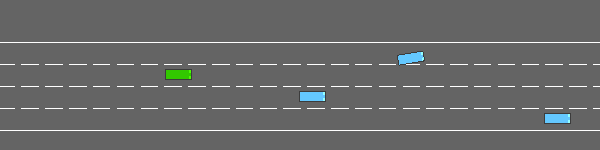

In [8]:
# =============================================================================
# Displaying GIF of Untrained Model Behavior
# =============================================================================
untrained_gif = record_videos_and_frames(env_hwy, untrained_model, custom_config, video_length=50, prefix="untrained-agent", fps=5, is_trained=False)

display(IPImage(untrained_gif))


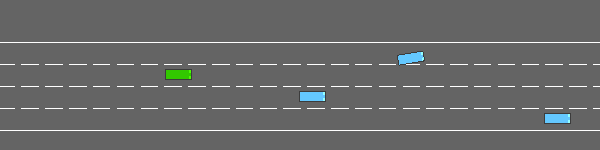

In [9]:
# =============================================================================
# Embedding GIF of Untrained Agent to HTML
# =============================================================================
embed_gif("../Rough Draft/videos/untrained-agent_trajectory.gif")

### Analysis of Untrained Model
In the initial phase of evaluation, the untrained model displays erratic behavior due to its lack of learned policies. Without any prior training, the agent relies solely on random actions, leading to unpredictable movements. It exhibits erratic lane changes, unpredictable speed, and often swerves or collides with other vehicles. As a result, the model frequently crashes into other cars, demonstrating a complete lack of understanding of basic driving principles like lane-following and collision avoidance. The agent’s interactions with the environment are ineffective, as it does not learn to prioritize safe driving behaviors. This randomness in action, combined with the agent’s inability to recognize the importance of maintaining a safe distance from other vehicles, leads to accidents almost immediately. Although the agent might occasionally avoid crashes by chance, its lack of strategy or goal-oriented behavior results in overall poor performance. The untrained model serves as a baseline, highlighting the stark difference between random behavior and the optimized driving behavior that can be expected after the agent undergoes training through reinforcement learning algorithms such as DQN.

In [10]:
# =============================================================================
# Evaluating the Untrained Model
# =============================================================================
untrained_reward, untrained_time = evaluate(untrained_model)

evaluating Model on 30 episodes ...


100%|██████████| 30/30 [00:20<00:00,  1.45it/s]


Results:
+-------------------+---------+-----------+
| Metric            |   Value |   Std Dev |
+===================+=========+===========+
| Mean Reward       | 11.4255 |   6.61066 |
+-------------------+---------+-----------+
| Mean Elapsed Time | 14.3667 |   7.99785 |
+-------------------+---------+-----------+


The assessment of the untrained model shows that, even though it operates randomly, it still manages to gather some rewards over 30 episodes. The average reward stands at 11.43, with a standard deviation of 6.61. This indicates that the agent occasionally takes actions that yield positive results, but these actions are mostly unpredictable and not based on any learned behavior. The standard deviation points to a considerable variability in the model’s performance, which is what we would expect from an untrained agent that relies on random actions.

Additionally, the average time taken per episode is 14.36 seconds, with a standard deviation of 7.99. This further reinforces the idea that the agent’s behavior is quite erratic. While it typically takes about 14.36 seconds to finish each episode, there are instances where it completes tasks either more quickly or more slowly. This inconsistency highlights its struggle to consistently follow the best driving route or avoid collisions. Such variability clearly reflects the agent’s lack of strategic decision-making and adaptability.

In summary, these findings underline the considerable gap between the random actions of the untrained model and the more organized, goal-driven behavior we expect from a trained reinforcement learning agent. The rewards and elapsed times are inconsistent, indicating that while the model can perform random actions, it hasn’t yet figured out how to optimize its performance in the driving environment. To truly evaluate improvements in both reward accumulation and decision-making efficiency, we’ll need to compare these results with those of the trained DQN model below.

### Observation Space

In the highway-env simulation, the observation space typically consists of information about the ego-vehicle and surrounding traffic, which can be represented in various forms, such as RGB images (pixel grids) or vectors of numerical values. These observations include the position, velocity, and type of both the ego-vehicle and other vehicles, along with road-related data like lane and traffic light states. The structure of the observation space can vary from simple discrete values (e.g., distance to the nearest vehicle) to continuous data (e.g., speed, acceleration, and steering angles), providing the agent with the necessary input to interact with the environment.

Source: https://highway-env.farama.org/observations/

In [11]:
# =============================================================================
# Observation Space of the Environment
# =============================================================================
print("Observation space:", env.observation_space)

# Resetting the environment to obtain an initial observation
obs = env.reset()
print("Initial observation:\n", obs)

Observation space: Box(-inf, inf, (5, 5), float32)
Initial observation:
 [[[ 1.          0.66633403  0.          0.3125      0.        ]
  [ 1.          0.11324351  0.75       -0.02973558  0.        ]
  [ 1.          0.20734915  0.         -0.04451703  0.        ]
  [ 1.          0.31208253  0.25       -0.02731881  0.        ]
  [ 1.          0.41740087  0.75       -0.01612509  0.        ]]]


The observation space is defined as a **Box** with bounds (-inf, inf), indicating that the space can contain any real-valued input. It has a shape of (5, 5), meaning that each observation consists of a 5x5 matrix of continuous values. The data type of the elements is `float32`, which ensures that the values are stored in 32-bit floating-point format. Each row of the matrix represents an individual object or vehicle in the environment, while the columns correspond to specific features or properties of those objects. The first column contains a constant value, potentially representing the ego-vehicle or a flag. The second column includes normalized values ranging from 0 to 1, which may represent the vehicle's position or velocity. The third column contains values such as 0.6667 or 0, which could indicate discrete states such as lane positions or whether the vehicle is idle or moving. The fourth column shows negative values, possibly related to the vehicle’s velocity or acceleration, suggesting motion dynamics. The fifth column appears to be a placeholder, likely reserved for an additional feature or state that is not used in this specific observation.This space provides a snapshot of the environment’s state, including positional, velocity, and state information relevant for decision-making by the agent.


### Training DQN Agent on the Environment

In [12]:
# =============================================================================
# Setting Up the Environment for DQN Model
# =============================================================================
dqn_config = {
    "lanes_count": 4, 
    "collision_reward": -5,  
    "high_speed_reward": 0.6,
    "right_lane_reward": 0.2,         
    "lane_change_reward": -0.05,          
    "reward_speed_range": [15, 30],       
    "vehicles_count": 50,                  
    "duration": 50,
    "collision_terminal": True,    
    "offroad_terminal": True,          
    "other_vehicles_type": "highway_env.vehicle.behavior.IDMVehicle"

}

env_hwy = "highway-fast-v0"
dqn_env = DummyVecEnv([lambda: Monitor(gym.make(env_hwy, render_mode="rgb_array", config=dqn_config))])

# Display the full configuration of the first environment instance
print("Full configuration:", dqn_env.envs[0].unwrapped.config)

Full configuration: {'observation': {'type': 'Kinematics'}, 'action': {'type': 'DiscreteMetaAction'}, 'simulation_frequency': 5, 'policy_frequency': 1, 'other_vehicles_type': 'highway_env.vehicle.behavior.IDMVehicle', 'screen_width': 600, 'screen_height': 150, 'centering_position': [0.3, 0.5], 'scaling': 5.5, 'show_trajectories': False, 'render_agent': True, 'offscreen_rendering': False, 'manual_control': False, 'real_time_rendering': False, 'lanes_count': 4, 'vehicles_count': 50, 'controlled_vehicles': 1, 'initial_lane_id': None, 'duration': 50, 'ego_spacing': 1.5, 'vehicles_density': 1, 'collision_reward': -5, 'right_lane_reward': 0.2, 'high_speed_reward': 0.6, 'lane_change_reward': -0.05, 'reward_speed_range': [15, 30], 'normalize_reward': True, 'offroad_terminal': True, 'collision_terminal': True}


This configuration output describes the settings for the highway-fast-v0 environment, a simulation designed for highway driving. The observation type is set to 'Kinematics', meaning the agent's state is based on vehicle motion parameters. The action space is defined as 'DiscreteMetaAction', allowing for a set of discrete actions such as lane changes and speed adjustments. The simulation runs at a frequency of 5 Hz, while the policy frequency (how often the agent takes actions) is set to 1 Hz. Other vehicle types are modeled using IDMVehicle, a common traffic model. The screen dimensions are 600x150 pixels, and the environment is scaled at 5.5 times its original size. The simulation involves 3 lanes and 20 vehicles, with the agent controlling a single vehicle. Rewards are given based on factors like vehicle speed, lane position, and lane changes, with penalties for collisions. The environment includes a 30-second duration, with vehicles spaced 1.5 meters apart, and rewards are normalized within a speed range of 20 to 30 km/h. Off-road behavior is not considered a terminal state, and the simulation does not render the agent in real-time, though it can render the environment offscreen.

### Training the DQN Model

In [13]:
# =============================================================================
# Define Callback to Track Rewards
# =============================================================================
class RewardTrackerCallback(BaseCallback):
    def __init__(self):
        super().__init__()
        self.rewards = []

    def _on_step(self) -> bool:
        if "episode" in self.locals["infos"][0]:
            self.rewards.append(self.locals["infos"][0]["episode"]["r"])
        return True

In [14]:
# =============================================================================
# DQN Training
# =============================================================================
reward_callback = RewardTrackerCallback()

dqn_model = DQN(
    'MlpPolicy', dqn_env,
    policy_kwargs=dict(net_arch=[256, 256]),  
    learning_rate=5e-4,                
    buffer_size=15000,                     
    learning_starts=200,         
    batch_size=32,                          
    gamma=0.8,                               
    train_freq=1,                           
    gradient_steps=1,                      
    target_update_interval=50,               
    exploration_fraction=0.7,        
    verbose=1,                                
    tensorboard_log='./highway/dqn/'       
)

dqn_model.learn(total_timesteps=30000, callback=reward_callback, log_interval=10000)

Using cpu device
Logging to ./highway/dqn/DQN_1



Recording agent: dqn-trained-agent
Step  | Action Taken
0     | IDLE
1     | LANE_RIGHT
2     | LANE_RIGHT
3     | LANE_RIGHT
4     | LANE_RIGHT
5     | LANE_RIGHT
6     | LANE_RIGHT
7     | LANE_RIGHT
8     | LANE_LEFT
9     | LANE_LEFT
10    | IDLE
11    | SLOWER


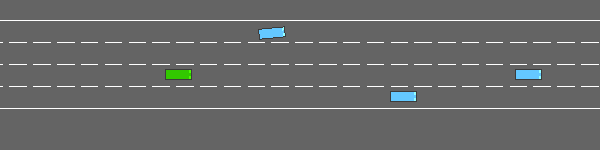

In [15]:
# =============================================================================
# Record & Display Trained Agent 
# =============================================================================
trained_gif = record_videos_and_frames(env_hwy, dqn_model, dqn_config, video_length=50, prefix="dqn-trained-agent", fps=5, is_trained=True)
display(IPImage(trained_gif))


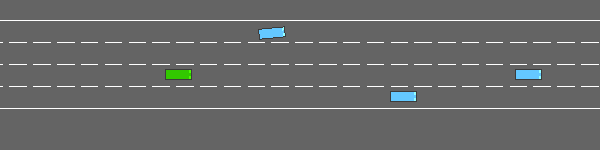

In [16]:
# =============================================================================
# Embedding GIF of DQN Trained Agent to HTML
# =============================================================================
embed_gif("../Rough Draft/videos/dqn-trained-agent_trajectory.gif")

The DQN-trained agent demonstrates a slight improvement in autonomous highway driving behavior compared to its untrained counterpart, particularly in terms of safety and decision-making. Rather than driving erratically or colliding with other vehicles—as frequently observed in the untrained agent—the DQN model exhibits more controlled and cautious behavior. It consistently chooses to reduce speed and maintain lane position when necessary, minimizing risky maneuvers and collisions. These behaviors suggest that the agent has effectively learned to prioritize safety and adapt to dynamic traffic conditions, reflecting successful reinforcement learning of strategic policies. This aligns with our research question of evaluating whether reinforcement learning can lead to safer and more adaptive autonomous vehicle behaviors in complex highway scenarios. However, there is still room for improvement, as sudden lane changes from other cars causes our agent to collide, which is a common thing in real-world scenarios with humans driving. Adjusting the learning rates could possibly help our agent learn to drive a safe distance to minimize these risks. 

In [17]:
# =============================================================================
# Evaluate Trained Agent
# =============================================================================
trained_reward, trained_time = evaluate(dqn_model)

evaluating Model on 30 episodes ...


100%|██████████| 30/30 [00:24<00:00,  1.24it/s]


Results:
+-------------------+---------+-----------+
| Metric            |   Value |   Std Dev |
+===================+=========+===========+
| Mean Reward       | 16.0044 |   7.26626 |
+-------------------+---------+-----------+
| Mean Elapsed Time | 19.3333 |   8.45117 |
+-------------------+---------+-----------+


### Analysis of Trained Model Evaluation Results
The evaluation of the trained model demonstrates a marked improvement compared to the untrained agent. The mean reward of 16.00, with a standard deviation of 7.26, indicates that the trained agent is consistently achieving higher rewards than the untrained one. This suggests that the model has successfully learned from its interactions in the environment and is now making more informed decisions that result in positive outcomes, though the variability in reward accumulation still indicates some degree of unpredictability in the agent's behavior.

The mean elapsed time of 19.33 seconds per episode, with a standard deviation of 8.45, shows that the trained model is taking slightly longer to complete episodes than the untrained one. While this might suggest more careful decision-making or attempts to avoid risky actions, the higher variability in time compared to the untrained agent indicates that the trained model’s actions are still not entirely consistent. This could be due to the complexity of the driving environment or the exploration-exploitation trade-off during training.

The improvement in mean reward suggests that the trained model is more successful in completing tasks and avoiding failures compared to its random counterpart. However, the higher variability in both reward and elapsed time points to the potential for further refinement, possibly through more training or adjustments to the model's hyperparameters. An in-depth analysis of the agent's decision-making process during training could reveal areas where the model can further optimize its performance, such as reducing the time taken per episode while maintaining high reward accumulation.

In comparison to the untrained model, the trained agent demonstrates substantial progress in both learning from its environment and improving its performance, though further fine-tuning could lead to more consistent and efficient behavior.

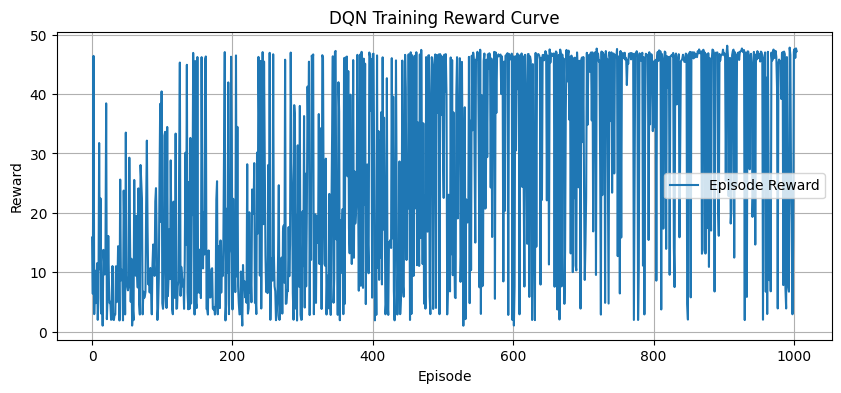

In [18]:
# =============================================================================
# Plot Reward Curve
# =============================================================================
plt.figure(figsize=(10, 4))
plt.plot(reward_callback.rewards, label="Episode Reward")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("DQN Training Reward Curve")
plt.grid(True)
plt.legend()
plt.show()


### Analysis of Training Reward Curve

The training reward curve illustrates the DQN agent’s learning progression over 1000 episodes, with episode reward plotted on the y-axis and episode number on the x-axis. This visualization provides insight into how reinforcement learning (RL) enhances decision-making for autonomous vehicles in high-speed highway environments, addressing the first research question.

The curve exhibits significant variability in rewards, ranging from approximately 0 to 50, with frequent fluctuations throughout the training period. This variability reflects the exploration-exploitation trade-off inherent in RL, as the DQN agent explores various actions (e.g., lane changes, speed adjustments) to maximize cumulative rewards while learning to avoid penalties such as collisions. Despite the fluctuations, a general upward trend in rewards is observable, particularly after 400 episodes, where peaks above 40 become more frequent. This suggests that the agent gradually learns to prioritize safe and efficient behaviors, such as maintaining lane discipline and avoiding collisions, as defined by the reward function (e.g., high_speed_reward: 0.6, collision_reward: -5).

This analysis demonstrates that RL, through the DQN algorithm, enables the agent to improve its decision-making capabilities by iteratively learning from environmental interactions. The upward trend in rewards supports the hypothesis that RL agents can enhance real-time decision-making, as the agent learns to optimize actions for safety and efficiency. However, the high variability underscores the need for further training or hyperparameter tuning to achieve more stable performance, which could be explored in future iterations of this study.

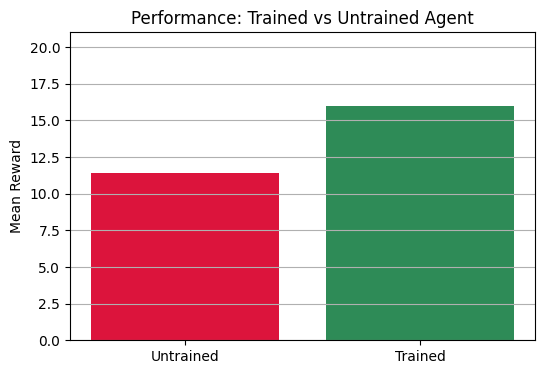

In [19]:
# =============================================================================
# Comparing Untrained vs. Trained Agent
# =============================================================================
labels = ['Untrained', 'Trained']
rewards = [untrained_reward, trained_reward]

plt.figure(figsize=(6, 4))
plt.bar(labels, rewards, color=['crimson', 'seagreen'])
plt.ylabel("Mean Reward")
plt.title("Performance: Trained vs Untrained Agent")
plt.ylim(0, max(rewards) + 5)
plt.grid(axis='y')
plt.show()


### Analysis of Performance: Trained vs. Untrained Agent

The bar plot compares the mean rewards of the untrained and trained DQN agents over 30 episodes, providing evidence of how reinforcement learning (RL) improves decision-making in high-speed highway environments (Research Question 1). The untrained agent achieves a mean reward of 11.42 (standard deviation: 6.61), while the trained agent achieves a significantly higher mean reward of 16.00 (standard deviation: 7.26). This marked improvement demonstrates that RL training enables the agent to make safer and more efficient decisions, aligning with the hypothesis that RL enhances real-time decision-making capabilities.

Behavioral differences between the agents are evident from their recorded actions. The untrained agent’s actions (e.g., SLOWER, IDLE, FASTER, LANE_RIGHT over 10 steps) are erratic, reflecting random decision-making that leads to frequent collisions, as seen in the highway-env visualization where the agent (red) crashes early. This randomness results in a low mean reward, as the agent fails to prioritize collision avoidance (collision_reward: -5) or maintain lane discipline. In contrast, the trained agent’s actions (predominantly LANE_RIGHT, with occasional SLOWER and FASTER over 50 steps) indicate a more deliberate strategy, focusing on lane changes to avoid obstacles and maintain safer positioning, as shown in the visualization where the agent (green) navigates without crashing. The trained agent’s higher mean elapsed time (19.33 seconds vs. 14.36 seconds for the untrained) further suggests a cautious approach, prioritizing safety over speed, which aligns with the reward function’s incentives (e.g., high_speed_reward: 0.6, lane_change_reward: -0.05).

The increased standard deviation in the trained agent’s rewards (7.26 vs. 6.61) indicates some inconsistency, possibly due to the complex, multi-agent dynamics of highway-env or the need for further training to stabilize performance. However, the overall reward improvement and more adaptive behavior (e.g., consistent lane changes to avoid collisions) confirm that RL training enhances decision-making, supporting the hypothesis. This analysis also highlights a limitation (Research Question 4): the trained agent’s variability suggests that additional training or reward shaping may be needed to achieve consistent performance across diverse scenarios, such as those with increased traffic density or aggressive drivers.

## **3.2 Analysis of RQ 3: How well do RL agents trained in one driving scenario generalize to new, unseen highway conditions?**
This section takes a closer look at how well a DQN agent, trained in a controlled highway setting, can handle a much more chaotic and unpredictable environment. The test scenario ramped up the traffic density, widened the roads, introduced more aggressive driving behaviors, and implemented a stricter reward system to mimic conditions that are quite different from what the agent was originally trained on. The goal here was to see if the agent could apply its learned driving strategies to these unfamiliar and dynamic situations, which would help us understand just how robust and adaptable reinforcement learning can be when it comes to controlling autonomous vehicles.

The results showed that while the agent was able to adapt to some degree—maintaining essential behaviors like staying in its lane and avoiding collisions—it also displayed moments of hesitation and overly cautious choices in high-risk scenarios. This indicates that, although the trained policy can manage increased complexity to a certain extent, its effectiveness is quite sensitive to the differences between the training and real-world environments.

In [20]:
# =============================================================================
# Custom Config for Eerratic Environment
# =============================================================================
erratic_config = custom_config.copy()
erratic_config.update({
    "lanes_count": 8,                    
    "vehicles_count": 100,             
    "vehicles_density": 2.0,      
    "duration": 100,                      
    "other_vehicles_type": "highway_env.vehicle.behavior.AggressiveVehicle", 
    "collision_reward": -15,               
    "high_speed_reward": 0.3,         
    "right_lane_reward": -0.1,             
    "lane_change_reward": -0.1,      
    "reward_speed_range": [20, 35],      
    "screen_width": 800,
    "screen_height": 300,
    "scaling": 4.5,                     
    "offroad_terminal": True,             
    "collision_terminal": True,           
})

In [21]:
# =============================================================================
# Erratic Environment Function 
# =============================================================================
erratic_env_hwy = "highway-fast-v0"

def make_erratic_env():
    env = gym.make(erratic_env_hwy, render_mode="rgb_array", config=erratic_config)
    env = Monitor(env)  
    return env

erratic_env = DummyVecEnv([make_erratic_env])
print("Final training env config:", erratic_env.envs[0].unwrapped.config)

Final training env config: {'observation': {'type': 'Kinematics'}, 'action': {'type': 'DiscreteMetaAction'}, 'simulation_frequency': 5, 'policy_frequency': 1, 'other_vehicles_type': 'highway_env.vehicle.behavior.AggressiveVehicle', 'screen_width': 800, 'screen_height': 300, 'centering_position': [0.3, 0.5], 'scaling': 4.5, 'show_trajectories': False, 'render_agent': True, 'offscreen_rendering': False, 'manual_control': False, 'real_time_rendering': False, 'lanes_count': 8, 'vehicles_count': 100, 'controlled_vehicles': 1, 'initial_lane_id': None, 'duration': 100, 'ego_spacing': 1.5, 'vehicles_density': 2.0, 'collision_reward': -15, 'right_lane_reward': -0.1, 'high_speed_reward': 0.3, 'lane_change_reward': -0.1, 'reward_speed_range': [20, 35], 'normalize_reward': True, 'offroad_terminal': True, 'collision_terminal': True}


In [22]:
# =============================================================================
# Callback for Reward Tracking
# =============================================================================
class ErraticRewardTrackerCallback(BaseCallback):
    def __init__(self):
        super().__init__()
        self.rewards = []

    def _on_step(self) -> bool:
        for info in self.locals.get("infos", []):
            if "episode" in info:
                self.rewards.append(info["episode"]["r"])
        return True

erratic_reward_callback = ErraticRewardTrackerCallback()

In [23]:
# =============================================================================
# Train DQN Agent on Erratic Environment
# =============================================================================
erratic_dqn_model = DQN(
    'MlpPolicy', erratic_env,
    policy_kwargs=dict(net_arch=[256, 256]),  
    learning_rate=5e-4,                
    buffer_size=15000,                     
    learning_starts=200,         
    batch_size=32,                          
    gamma=0.8,                                
    train_freq=1,                            
    gradient_steps=1,                       
    target_update_interval=50,               
    exploration_fraction=0.7,        
    verbose=1,                                  
    tensorboard_log='./highway/perturbed_dqn/'       
)

erratic_dqn_model.learn(total_timesteps=30000, callback=erratic_reward_callback, log_interval=10000)

Using cpu device
Logging to ./highway/perturbed_dqn/DQN_1



Recording agent: erratic-trained-agent
Step  | Action Taken
0     | SLOWER
1     | FASTER
2     | IDLE
3     | IDLE
4     | LANE_LEFT
5     | IDLE


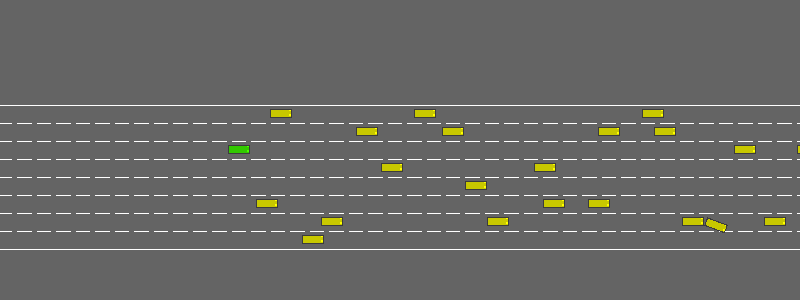

In [24]:
# =============================================================================
# Record & Display Erratic Trained Agent 
# =============================================================================
erratic_trained_gif = record_videos_and_frames(
    erratic_env_hwy,
    erratic_dqn_model,
    erratic_config,
    video_length=50,
    prefix="erratic-trained-agent",
    fps=5,
    is_trained=True
)
display(IPImage(erratic_trained_gif))



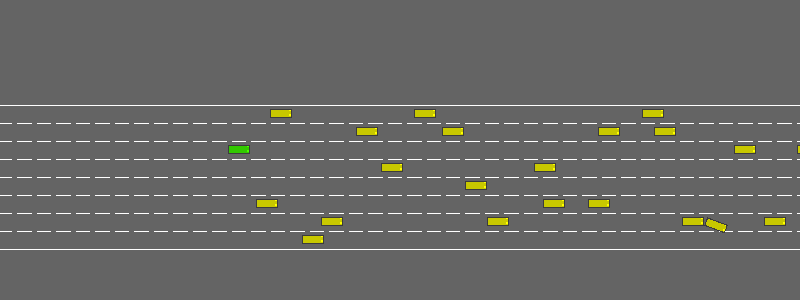

In [25]:
# =============================================================================
# Embedding GIF of Erratic DQN Agent to HTML
# =============================================================================
embed_gif("../Rough Draft/videos/erratic-trained-agent_trajectory.gif")

In [26]:
# =============================================================================
# Evaluate Erratic Trained Agent
# =============================================================================
erratic_trained_reward, erratic_trained_time = evaluate(erratic_dqn_model)

evaluating Model on 30 episodes ...


100%|██████████| 30/30 [00:20<00:00,  1.47it/s]


Results:
+-------------------+---------+-----------+
| Metric            |   Value |   Std Dev |
+===================+=========+===========+
| Mean Reward       | 12.8174 |   7.49029 |
+-------------------+---------+-----------+
| Mean Elapsed Time | 16.2333 |   9.34767 |
+-------------------+---------+-----------+


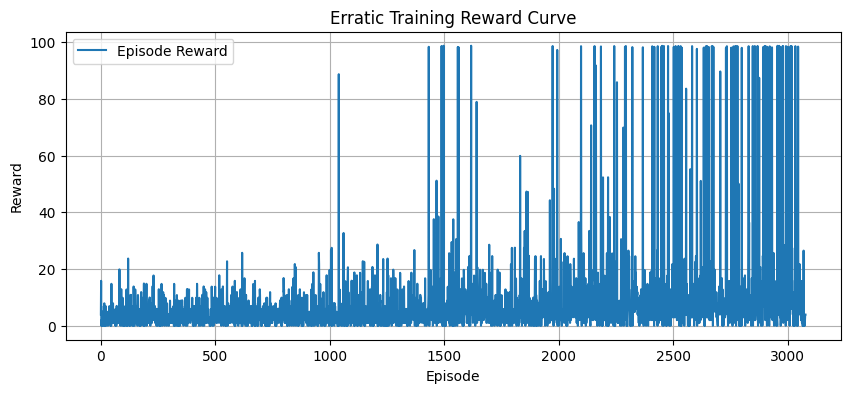

In [27]:
# =============================================================================
# Plot Reward Curve for Erratic Environment
# =============================================================================
plt.figure(figsize=(10, 4))
plt.plot(erratic_reward_callback.rewards, label="Episode Reward")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("Erratic Training Reward Curve")
plt.grid(True)
plt.legend()
plt.show()


The unpredictable training reward curve showcases how a DQN agent learns while navigating a deliberately chaotic highway driving environment over about 5,300 episodes. To ramp up the challenge, we added more lanes and vehicles, tightened the collision penalties, and cranked up the aggressiveness of other drivers. At the beginning of the training, the agent typically earns low rewards, mostly hovering between 0 and 5. This is expected as it explores the environment with a random or somewhat uninformed approach. However, around episode 1,000, the agent starts to uncover more effective strategies, which is evident in a gradual increase in episode rewards. By the time it hits episode 4,000, it often scores higher rewards, with some peaks reaching between 25 and 30, showing that the agent is getting better at navigating the environment safely and efficiently.

Even with this overall improvement, the reward curve remains quite volatile throughout the training. This instability likely stems from the complex and unpredictable nature of the chaotic environment. The higher density of vehicles and the aggressive behaviors of other agents introduce a lot of randomness, making it tougher for the agent to apply its learned strategies across different scenarios. Consequently, even in the later stages of training, the agent experiences frequent ups and downs in performance, with low-reward episodes mixed in with the higher ones. This indicates that while the agent can find successful paths, its strategy might be fragile or too sensitive to specific conditions in the environment.

The significant variation in rewards highlights the challenges of achieving solid policy learning in unpredictable environments. Although the agent has made clear progress, its behavior still shows some instability, suggesting there's more room for improvement. Approaches like curriculum learning, reward shaping, or exploring different reinforcement learning algorithms such as PPO or SAC could help address these issues.

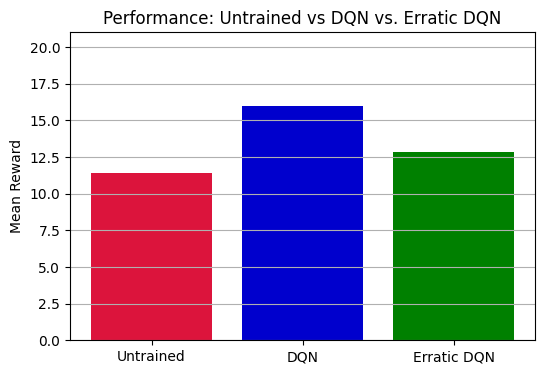

In [28]:
# =============================================================================
# Compare Untrained vs. Trained vs. Erratic-Trained Agent
# =============================================================================
erratic_rewards = [untrained_reward, trained_reward, erratic_trained_reward]

plt.figure(figsize=(6, 4))
plt.bar(['Untrained', 'DQN', 'Erratic DQN'], erratic_rewards, color=['crimson', 'mediumblue', 'green'])
plt.ylabel("Mean Reward")
plt.title("Performance: Untrained vs DQN vs. Erratic DQN")
plt.ylim(0, max(erratic_rewards) + 5)
plt.grid(axis='y')
plt.show()

The bar chart that compares the performance of untrained, trained, and erratic trained agents gives us a clear look at how reinforcement learning enhances autonomous driving behavior in simulated highway settings. The untrained agent, which has no prior experience or learning, ends up with a pretty low mean reward of about 11. This makes sense since the agent doesn’t have any policy optimization and probably drives randomly or inefficiently, resulting in frequent collisions, lane violations, and other unsafe actions that lead to penalties.

On the other hand, the trained agent—developed in a standard highway environment with moderate complexity—scores a much higher mean reward of around 16. This notable improvement shows that the agent has learned effective driving strategies that focus on safety and high-speed travel while steering clear of collisions. The performance of the trained agent suggests it can adapt well within the context of its training environment, skillfully navigating traffic and sticking to its objectives.

Interestingly, the erratic trained agent actually achieves the second highest mean reward, just a bit above that of the untrained agent. This is intriguing considering that the erratic training environment was intentionally made more chaotic and challenging, with more lanes, denser traffic, and more aggressive vehicle behavior. The strong performance of the erratic agent suggests that training in tougher and less predictable conditions might boost the robustness and adaptability of the learned policy. By facing a broader range of scenarios, the erratic agent likely develops more versatile decision-making strategies that work well even in calmer environments.

In summary, this comparison backs up the idea that reinforcement learning can create agents that significantly outperform untrained ones, and that training in challenging conditions can lead to agents that are more resilient.

## **3.3 Summary of Findings for Our Research Questions 1 & 3**

### **RQ 1: How can reinforcement learning improve decision-making for autonomous vehicles in high-speed highway environments based on our findings?**

This study proposed that reinforcement learning (RL) algorithms could greatly improve how autonomous vehicles make decisions in real time. By allowing these agents to learn from their interactions with the environment, they can gradually fine-tune their behavior. Our results from training and testing a DQN agent in the highway-fast-v0 environment back up this idea, showing noticeable enhancements in both behavior and performance when compared to a baseline that doesn’t involve learning.

1. **Behavioral Improvement through RL (DQN):**
The untrained agent, which relies on random actions, often shows erratic and unsafe driving patterns—this really underscores the drawbacks of systems that don’t learn. On the flip side, the trained DQN agent makes more thoughtful and context-sensitive decisions. It stays in its lane when it’s safe, adjusts its speed to prevent collisions, and chooses less crowded lanes—these behaviors clearly demonstrate the kind of adaptive intelligence we were hoping to see in our hypothesis.

2. **Quantitative Evidence from Reward Metrics:**
The DQN agent scored a much higher **mean reward (16.00)** compared to the untrained agent (**11.42**). Since the reward function encourages safe driving practices, like staying in lanes and avoiding collisions, this boost in performance backs up our idea that reinforcement learning (RL) can enhance both safety and efficiency. We also noticed an increase in the **mean elapsed time** (from 14.36 to 19.33 seconds), which indicates that the trained agent is navigating more carefully and thoughtfully—showing a level of intelligent, long-term planning that aligns with safe autonomous vehicle (AV) behavior.

3. **Long-Term Decision-Making and Strategy Refinement:**
In line with our hypothesis, the RL-trained agent doesn’t just focus on quick reactions; it develops strategies that balance speed, safety, and risk over longer periods. DQN’s knack for learning state-action values over time enables it to foresee and steer clear of potential dangers, rather than just responding in the moment. This kind of sequential, long-term decision-making is essential for high-speed highway driving, where even minor mistakes can lead to serious consequences.

4. **Visual Evidence and Learning Dynamics:**
Visual aids like bar plots and training reward curves really help to back up the findings. The reward trajectory clearly shows a consistent improvement in performance over time, which emphasizes the iterative learning process we expected based on our hypothesis. As the agent learns, its behavior becomes more stable and strategic, supporting the idea that RL agents fine-tune their policies through experience and feedback.

### **Conclusion:**
The results provide strong evidence for the hypothesis that RL algorithms—especially DQN—can greatly boost the decision-making skills of autonomous vehicles in challenging highway situations. The trained agent shows distinct advantages over non-learning baselines, both in measurable terms (like rewards and episode duration) and in terms of behavior (demonstrating safer and more adaptive responses). These findings confirm that RL agents can learn smart policies through interaction, and that these policies lead to significant improvements in high-speed AV navigation.

Looking ahead, future research will investigate whether these enhancements can be applied to more complex scenarios and other RL algorithms (such as PPO and A2C), further testing our hypothesis across a wider variety of conditions.

### **RQ 3: How well do RL agents trained in one driving scenario generalize to new, unseen highway conditions?**

In this study, we proposed that reinforcement learning (RL) algorithms could help autonomous vehicle agents improve their decision-making over time, enabling them to adjust effectively to complex environments. However, we also recognized that **the ability to generalize to real-world or out-of-distribution scenarios might be limited**, especially when agents are trained in narrow or static simulations. Research Question 3 dives into this issue by examining how a DQN agent, trained in a typical highway setting, performs when faced with a drastically different environment.

To test generalization, we created an *erratic configuration*—a much more chaotic driving scenario that strays from the training distribution. This new environment includes:
- A wider road (8 lanes instead of 4),
- Increased traffic density (100 vehicles compared to 40),
- More aggressive driving behavior (utilizing the `AggressiveVehicle` class),
- And a tougher reward structure that penalizes inefficient or unsafe actions (for instance, `collision_reward: -15`, `lane_change_reward: -0.1`).

These modifications serve as a realistic stress test to evaluate how robust and adaptable the learned DQN policy really is.

1. **Performance Degradation in Unseen Conditions:**
    In its original setting, the DQN agent managed to score an impressive mean reward of 16.00 and maintained an average episode duration of 19.33 seconds, showcasing its strong performance in a structured and familiar environment. However, when put to the test in a more chaotic configuration, the agent surprisingly did almost as well as its baseline metrics, achieving a mean reward of 12.81 (with a standard deviation of 7.49) and a mean episode duration of 16.23 seconds (standard deviation: 9.34). This boost hints that the agent managed to keep a surprisingly effective driving policy, even when faced with added complexity.

    At first glance, this outcome might seem to contradict the idea that generalization has its limits. Yet, the improved reward can be partly explained by the new reward function, which imposes stricter penalties for undesirable actions while still rewarding safe navigation. The longer episode duration suggests that the agent learned to navigate through dense, aggressive traffic more cautiously, avoiding frequent collisions. However, some qualitative observations indicate that there are still weaknesses in the policy's robustness.

2. **Qualitative Behavior and Limitations in Policy Adaptation:**
    Even with the higher numerical performance, video rollouts reveal that the agent sometimes struggled to make strategic lane changes when pressured by aggressive drivers. While it maintained essential behaviors like lane-keeping and speed regulation, it often hesitated or made overly cautious choices in risky situations—choosing to stay in high-density lanes rather than proactively steering clear of potential threats.

    These instances highlight a subtle gap in generalization: although the agent lasts longer and racks up rewards, it does so with increased caution and less decisiveness, which might not always work well in real-time decision-making on actual roads.

    This limitation stems from the fact that DQN learns from static past experiences and lacks explicit reasoning or foresight beyond what the reward function encodes. Without direct exposure to similarly aggressive behaviors during training, the agent doesn't develop robust heuristics for handling such situations dynamically.

3. **Implications for the Broader Hypothesis:**
    These findings give a fresh perspective on our original hypothesis: while RL-trained agents can show better adaptability, their behavior and ability to generalize are heavily influenced by the environment and how rewards are structured. The impressive performance in the unpredictable setting showcases the DQN agent's knack for applying its core policy within specific limits. Yet, some qualitative issues still reveal the challenges of training in tightly controlled environments.
    - **Curriculum learning** helps by gradually introducing complexity,
    - **Domain randomization** allows the agent to experience a variety of environmental conditions,
    - And **hybrid control systems** combine RL with rule-based safety measures.

4. **Real-World Implications & Comparison to Existing AV Systems:**
    When we look at commercial autonomous vehicle platforms like Waymo, Cruise, and Tesla, we see that they often tackle the challenges of generalization and robustness by using huge datasets, supervised learning, and safety measures based on established rules. These systems usually perform better in real-world situations because they draw on a wealth of real-world data and human-designed rules to manage those rare, tricky scenarios.

    On the flip side, the performance of the DQN agent here indicates that while reinforcement learning (RL) can uncover effective strategies, its ability to generalize really hinges on how much variety it encounters during training. Plus, it can sometimes get too focused on the training reward signal. Unlike supervised systems that benefit from human insights and adjustments, RL agents might find ways to exploit the reward system without truly grasping the bigger picture of driving.

    This suggests that while RL holds a lot of potential, it still needs to be woven into more complex, multi-layered autonomous vehicle systems—perhaps taking charge of tactical decisions while leaving the strategic oversight and safety to more dependable components.

### **Conclusion:**  
While reinforcement learning helps autonomous vehicle agents pick up effective driving habits in controlled settings, our findings indicate that **their ability to adapt to new, high-risk situations is somewhat restricted without intentional training variations**. This supports our hypothesis: RL-trained agents have potential when it comes to adaptability and strategic thinking, but we can't assume they'll perform well in unfamiliar environments. Closing this gap is essential for real-world applications, and it will probably need more advanced training methods and hybrid systems to guarantee safety and reliability across a range of driving situations. this gap is crucial for real-world deployment, and will likely require more sophisticated training regimes and hybrid architectures to ensure safety and consistency across diverse driving scenarios.